#KNN from Scratch

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv("/content/drive/MyDrive/session-datasets-20240112T174036Z-001/session-datasets/week 28 Social_Network_Ads.csv")

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df =df.iloc[:,1:]
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as Knn
encode = LabelEncoder()
df['Gender'] = encode.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
scaler = StandardScaler()
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values
X = scaler.fit_transform(X)
print(X)

[[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.98019606  1.17910958 -1.46068138]
 [ 1.02020406 -0.15807423 -1.07893824]
 [-0.98019606  1.08359645 -0.99084367]]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
apnaknn = Knn(n_neighbors=5)
apnaknn.fit(X_train,y_train)
apnaknn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
Y_pred = knn.predict(X_test)

print(accuracy_score(y_test,Y_pred))



0.95


#Create class

In [ ]:
import numpy as np
from collections import Counter

class KNN:

  def __init__(self,k):
    self.n_neighbors = k
    self.X_train = None
    self.y_train = None


  def fit(self,X_train,y_train) : # Changed 'Self' to 'self'
    self.X_train = X_train
    self.y_train = y_train

  def predict(self,X_test):
    y_pred = []  # Initialize y_pred
    for i in X_test:
          #calcute distance with each training point
        distances = []  # Initialize distances for each test point
        for j in self.X_train:
            distances.append(self.calculate_destance(i,j))  # Append to distances
        n_neighbours = sorted(enumerate(distances), key= lambda x:x[1])[0:self.n_neighbors]
        labels = self.majority_count(n_neighbours)
        y_pred.append(labels)
    return np.array(y_pred)

  def calculate_destance(self,i,j):
    return np.linalg.norm(i-j)  # Return the calculated distance

  def majority_count(self,neighbours):
      votes = []  # Initialize votes as a list
      for i in neighbours:
        votes.append(self.y_train[i[0]])
      return Counter(votes).most_common()[0][0]  # Directly return the majority vote



In [ ]:
k = KNN(5)

k.fit(X_train,y_train)
k.predict(X_test)

print(accuracy_score(y_test,Y_pred))

0.95


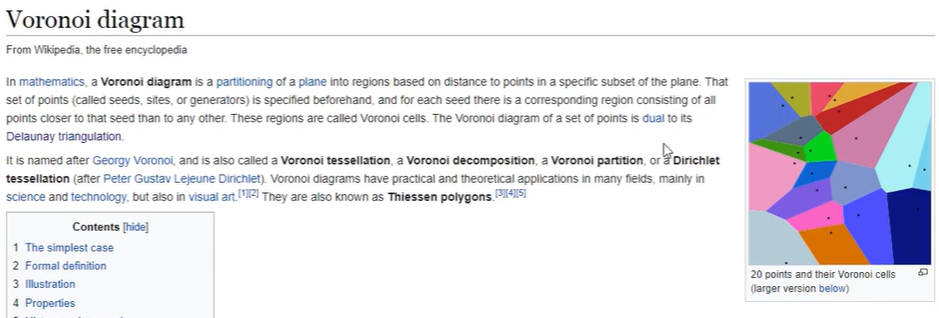

#KNN Decission Surface creation :

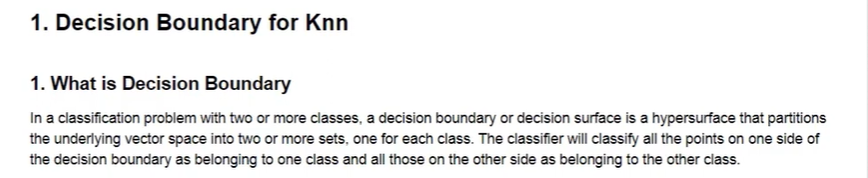

 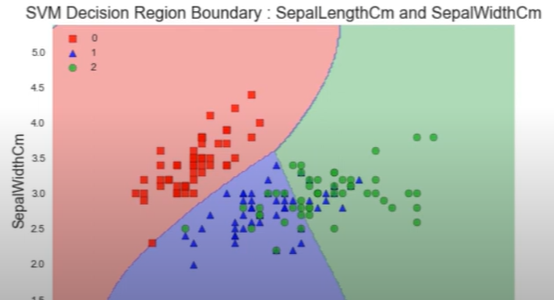

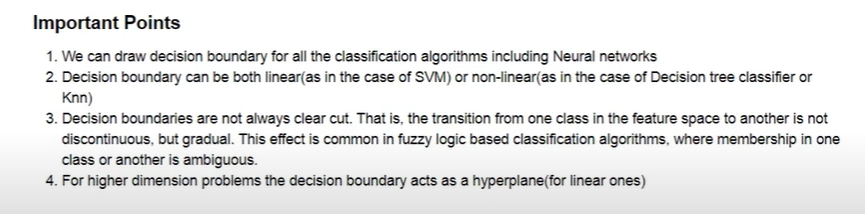

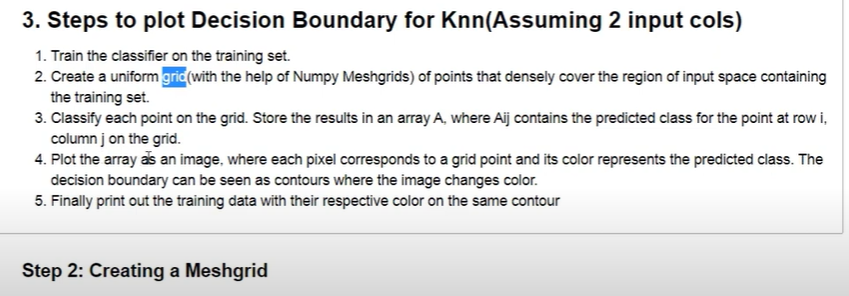

In [ ]:
# Sample code for generation of first example
import numpy as np
# from matplotlib import pyplot as plt
# pyplot imported for plotting graphs

x = np.linspace(-4, 4, 9)

# numpy.linspace creates an array of
# 9 linearly placed elements between
# -4 and 4, both inclusive
y = np.linspace(-5, 5, 11)

# The meshgrid function returns
# two 2-dimensional arrays
x_1, y_1 = np.meshgrid(x, y)

print("x_1 = ")
print(x_1)
print("y_1 = ")
print(y_1)


x_1 = 
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]]
y_1 = 
[[-5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.]]


In [ ]:
x = np.linspace(-40, 40, 100)
y = np.linspace(-50, 50, 90)
xx, yy = np.meshgrid(x, y)

In [ ]:
z = ((xx**2) + (yy**2))

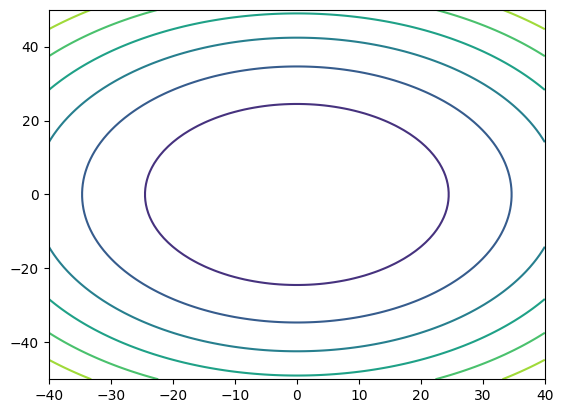

In [ ]:
from matplotlib import pyplot as plt
plt.contour(xx, yy, z)